<a href="https://www.kaggle.com/rohandawar/cap-cumulative-accuracy-profile-analysis-1?scriptVersionId=89746151" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

_In this notebook, I am trying to implement learn about **CAP – Cumulative Accuracy Profile analysis**_

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-network-ads/Social_Network_Ads.csv


In [2]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc

In [3]:
#read the data
data = pd.read_csv('/kaggle/input/social-network-ads/Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


For this demo, I am only taking the numerical columns namely **Age**, **EstimatedSalary** & **Purchased**

In [4]:
#define X & y
X = data.iloc[:, 2:4]
y = data.iloc[:,4]

X.shape, y.shape

((400, 2), (400,))

In [5]:
#splitting the training & test data
x_train, x_test, y_train, y_test  = train_test_split(X,y, test_size=0.3, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((280, 2), (120, 2), (280,), (120,))

In [6]:
#fit the classifier
classifier = RandomForestClassifier(n_estimators=400)

#training
classifier.fit(x_train, y_train)

#prediction
pred = classifier.predict(x_test)

In [7]:
#model performancy
print('Accuracy: ', accuracy_score(y_test, pred))

Accuracy:  0.9083333333333333


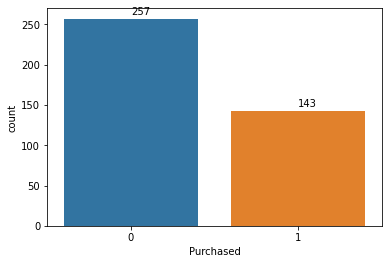

In [8]:
ax = sns.countplot(x='Purchased', data=data)

for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x()+ (p.get_width()/2),
           y= height+5,
           s=height)
plt.show()

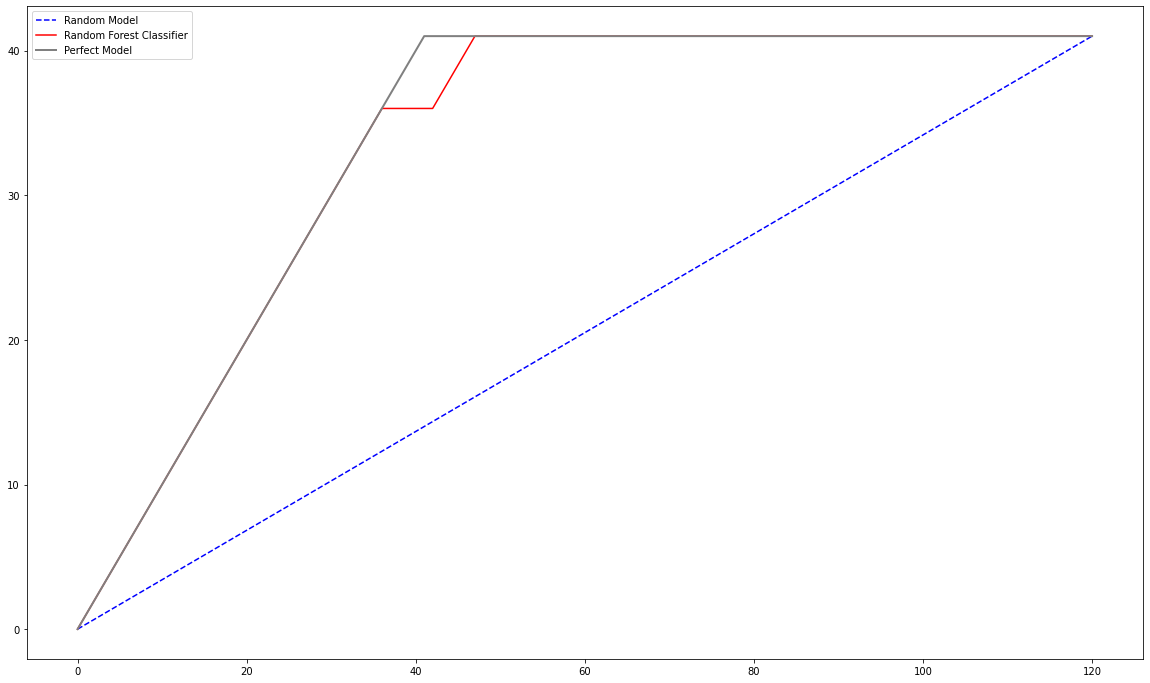

In [9]:
#plotting
total = len(y_test)

#counting 1 lables in test data
one_count = np.sum(y_test)

#counting 0 lables
zero_count = total - one_count

#model plotting
lm = [y for _,y in sorted(zip(pred,y_test), reverse=True)]
x = np.arange(0, total+1)
y = np.append([0], np.cumsum(lm))

plt.figure(figsize = (20, 12))

plt.plot([0,total], [0,one_count], c='b', linestyle='--', label='Random Model')
plt.plot(x,y, c='r', label = 'Random Forest Classifier')
plt.plot([0, one_count, total], [0, one_count, one_count],
         c = 'grey', linewidth = 2, label = 'Perfect Model')
# # Point where vertical line will cut trained model
# index = int((50*total / 100))

# ## 50% Verticcal line from x-axis
# plt.plot([index, index], [0, y[index]], c ='g', linestyle = '--')

# ## Horizontal line to y-axis from prediction model
# plt.plot([0, index], [y[index], y[index]], c = 'g', linestyle = '--')

# class_1_observed = y[index] * 100 / max(y)

plt.legend()
plt.show()




## CAP Analysis using Area Under Curve
The first method to analyse the CAP Curve is using Area Under Curve. Let’s consider area under random model as a. We calculate the Accuracy Rate using the following steps:
* Calculate the area under the perfect model (aP) till the random model (a)
* Calculate the area under the prediction model (aR) till the random model (a)
* Calculate Accuracy Rate (AR) = aR / aP
* The closer the Accuracy Rate is to the 1, better is the model.

In [10]:
# Area under Random Model
a = auc([0, total], [0, one_count])

# Area between Perfect and Random Model
aP = auc([0, one_count, total], [0, one_count, one_count]) - a

# Area between Trained and Random Model
aR = auc(x, y) - a

print("Accuracy Rate for Random Forest Classifier: {}".format(aR / aP))


Accuracy Rate for Random Forest Classifier: 0.9814757641247298


# > *****### All code Ends Here!!*